# წარმოებული - მრავალცვლადიანი ფუნქციები


Გავიხსენოთ, როგორ შეგვიძლია გამოვსახოთ წერტილი სამ განზომილებიან საკოორდინატო სიბრტყეში:

Ინსტრუქცია არის ზუსტად იგივე, რითიც ვხელმძღვანელობთ ორგანზომილებიან სიბრტყეში გრაფიკების ასაგება - მაგ. 1,3 ნიშნავს რომ x სიბრტყეზე უნდა გადავინაცვლოთ 1-ით, ხოლო y-ზე სამით და მოვნიშნოთ ეგ წერტილი. Ანალოგიურად, (1,2,5)-სთვის, 1 უნდა გადავზომოთ x-ზე, 2 y-ზე , 5 z ღერძზე და მივალთ ჩვენთვის სასურველ წერტილთან.


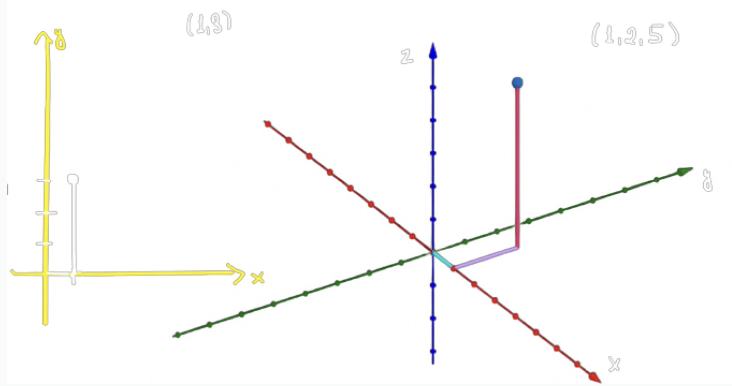

Მაგრამ არ დაგვავიწყდეს, რომ ამ წერტილების ორეულებით და სამეულებით მხოლოდ წერტილები არ ჩაიწერება - ასე ჩაიწერება ვექტორებიც, როგორც ორ, ისე სამ განზომილებაში.


Რას გვიჩვენებს ვექტორი ? - გვიჩვენებს გადაადგილებას - რამდენით უნდა გადავაადგილდეთ კონკრეტული წერტილიდან, ამ შემთხვევაში საკოორდინატო სიბრტყიდან მარჯვნივ 1 ით და ზევით 3 -ით, ამიტომ სიგრძესთან ერთად უნდა გამოვსახოთ მიმართულებაც - გავიხსენოთ განსხვავება სკალარულ და ვექტორულ სიდიდეებს შორის.
Ზუსტად Ანალოგიური პრინციპი მოქმედებს სამგანზომილებიან სამყაროშიც. Ვექტორი შეგვიძლია მოვდოთ ნებისმიერი წერტილიდან, და ის გვიჩვენებს როგორც გადაადგილების სიდიდეს, ისე მიმართულებას მოც. Წერტილიდან. Გავხისენოთ ვექტორების შეკრებაც ↓


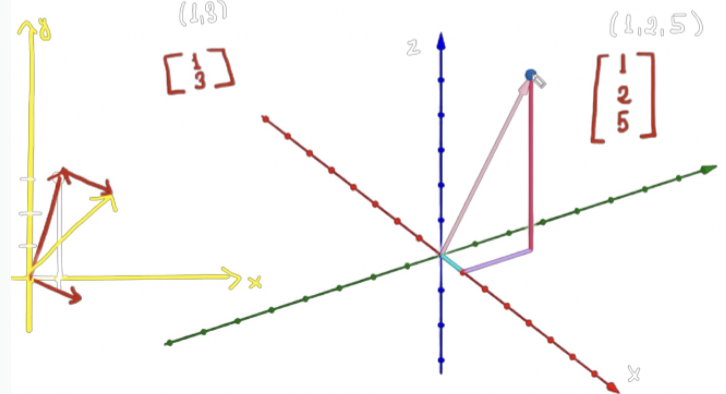

Წერტილების აგების მსგავსად, ცხადია, გვჭირდება ფუნქციების აგებაც სამგანზომილებიან სიბრტყეში. Პრინციპი ზუსტად იგივეა, გავიხსენოთ როგორ ვაგებთ ამა თუ იმ ფუქნციის გრაფიკს 2 განზომილებაში:
Თითოეული არგუმენტისთვის ვეძებთ ფუნქციის მნიშვნელობას, და მიღებული კოორდინატების წყვილებს ანუ წერტილებს აღვნიშნავთ სიბრტყეზე:


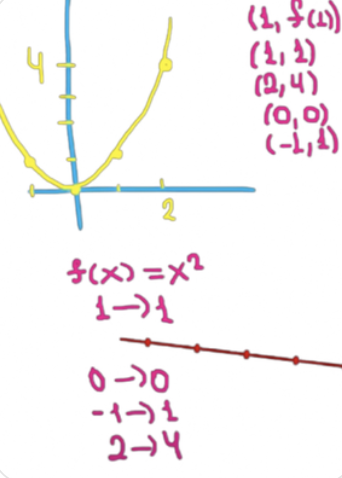

შემდეგ კი უბრალოდ ვაერთიანებთ ამ წერტილებს და ვიღებთ ფუნქციის გრაფიკს.

Ვცადოთ ანალოგიური სამ განზომილებაშიც:

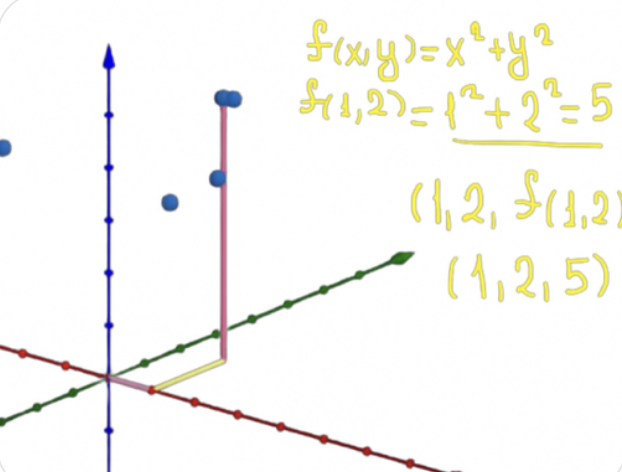

Ზუსტად ანალოგიური პრინციპით, ვიღებთ მსგავს გრაფიკს:


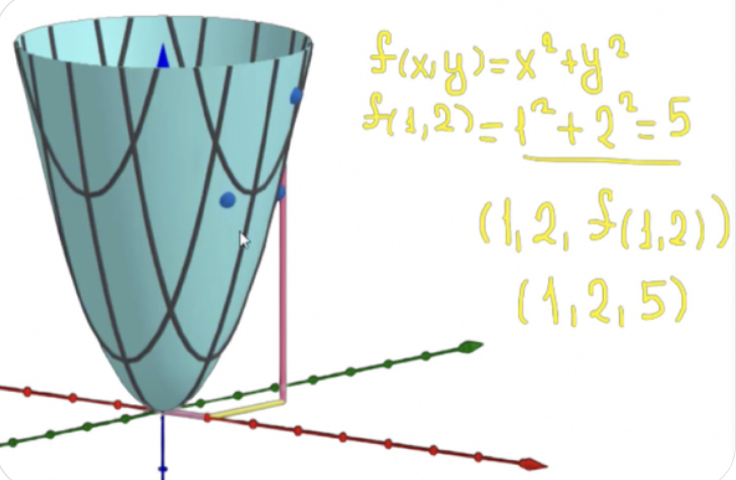

Დავაკვირდეთ ზედა ორგანზომილებიან გრაფიკს და მიღებულ სამგანზომილებიან გრაფიკს - ეს მსგავსება ცხადია არ არის შემთხვევითი - ჩვენი სამგანზომილებიანი ფუნქცია ხ^2 და ყ^2 ფუნქციებისგან შედგება
Ყურადღება გავამახვილოთ რას ნიშნავდა ჩვენთვის ფუნქციის მნიშვნელობა კონკრეტულ წერტილში - ფაქტობრივად, ეს იყო სიმაღლე არგუმენტების სიბრტყიდან - ანუ x სიბრტყიდან სიმაღლე. Სამგანზომილებიან სივრცეში - თმცა აქ ჩვენი არგუმენტების სივრცე არის (x,y) საკოორდინატო სიბრტყე, რადგან ჩვენი არგუმენტები არის x y წყვილები - აქაც იგივე პრინციპია, ფუნქციის მნიშვნელობა არის სიმაღლე, ოღონდ ამ შემთხვევაში x y სიბრტყიდან რაც ჩვენთვის არგუმენტების სივრცეა ( ამის მიხედვით შეგვიძლია დავფიქრდეთ როგორ შეიცვლებოდა გრაფიკის ფორმა ამ ჩვენ ფუნქციას სხვადასხვა კოეფიციენტი რომ მოვსდოთ წინ ) 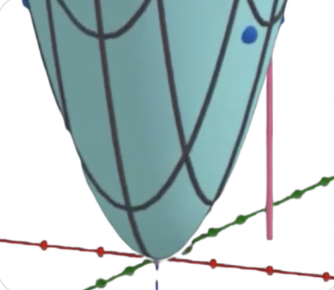




Რასაკვირველია,სამგანზომილებიანი რთული ფუქნციის გრაფიკის აგება არ არის მარტივი და მხოლოდ სათითაოდ წერტილების მონიშვნა არ არის ოპტიმალური გზა მათ დასახაზად, არსებობს სხვა ხრიკები და მიდგომები რომლებმაც შეიძლება გაგვიმარტოს ეგ საქმე იხ. ვიდეო: https://www.youtube.com/watch?v=cMsnEHrI_WU&list=PL3nu0cu3xi4ZDHHPvA7dKyTCj2vc0_RQj&index=5


Მოდი გავიხსენოთ, როგორ განვმარტეთ წარმოებული ორგანოზმილებიანი სიბრტყისთვის - ჩვენ ამით ვზომავდით ფუნქციის მნიშვნელობის ზრდის ფარდობას არგუმენტის მნიშვნელობის ცვლილებასთან: Რა ხდება, როდესაც მხოლოდ 1 კი არა რამდენიმე ცვლადი გვაქვს?

ამ დროს, ჩვენთვის საინტერესოა ფუნქციის მნიშვნელობის **ცვლილება თითოეული არგუმენტის მიმართ** - ანუ თუ მაგალიტად z(x,y) = x^2 + y^2, გვაინტერესებს როგორ იცვლება z იქსის ცვლილებასთან მიმართებით და ანალგოიურად y-ის ცვლილებასთან მიმართებით. Აქ შემოდის ე.წ.  კერძო  წარმოებულის ცნება, რომელიც გულისხმობს ფუნქციის გაწარმოებას კონკრეტული ცვლადის მიმართ, მაგ. x-სთვის:


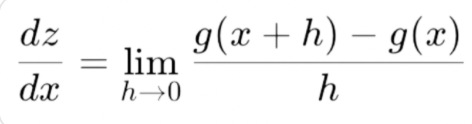

ეს ფორმულა ფაქტობრივად იგივეა, რაც ერთი ცვლადის ფუნქციის შემთხვევაში. y ცვლადს საერთოდ ვაიგნორებთ და ვანგარიშობთ ფუნქციის ცვლილების ფარდობას კონკრეტული ცვლადის მიმართ.

ცხადია, ანალოგიური სურათი გვექნება y-სთვისაც.

(აქ კარგი იქნება კერძო წარმოებულების გრაფიკები )